In [1]:
%pylab inline
import sys, os
sys.path.append(os.path.join('..','..'))
from genx import api
from genx.gui.bumps_notebook import NBMonitor

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
'Plugin' object has no attribute 'data'


In [2]:
import warnings

from bumps.fitters import LevenbergMarquardtFit, DEFit, fit, FIT_ACTIVE_IDS
from bumps.dream.views import *

warnings.filterwarnings('ignore')

## Load a GenX project and run a fit with bumps
See https://bumps.readthedocs.io/en/latest/api/fitters.html for fitter parameters

In [3]:
model,optimizer=api.load('D17_TOF_SiO.hgx')
model.compile_script()
print(FIT_ACTIVE_IDS)

['amoeba', 'de', 'dream', 'newton', 'lm']


### Try to fit with Levenberg-Marquard (will find next local minimum)

In [4]:
bproblem=model.bumps_problem() # only needed if NBMonitor is used
res=model.bumps_fit(method='lm', steps=250, problem=bproblem)
res.x

array([1.24376339e+03, 3.45276000e-02, 6.88282512e+00, 2.50000000e+00])

### Fit with Differential Evolution (de)

In [5]:
bproblem=model.bumps_problem() # only needed if NBMonitor is used
res=model.bumps_fit(method='de', steps=250, pop=15, monitors=[NBMonitor(bproblem)], problem=bproblem)
res.x

array([1.24378326e+03, 3.45282996e-02, 6.88291594e+00, 2.50000000e+00])

### Run already fitted model with MCMC method to get error statistics

In [6]:
res=model.bumps_fit(method='dream',  pop=15, samples=1e5, burn=100, thin=1, alpha=0, outliers='none', 
                         trim=False, monitors=[NBMonitor(bproblem)], problem=bproblem)

              Parameter       mean  median    best [   68% interval] [   95% interval]
 1       SiliconOxide_D 1243.78(18) 1243.782 1243.783 [1243.60 1243.96] [1243.42 1244.14]
 2    SiliconOxide_Dens 0.034528(12) 0.0345282 0.0345283 [0.034516 0.034540] [0.034505 0.034551]
 3   SiliconOxide_Sigma  6.881(95)   6.881   6.883 [   6.79    6.98] [   6.69    7.07]
 4            Sub_Sigma  2.547(47)   2.532   2.500 [   2.51    2.59] [   2.50    2.67]

Statistics and plots based on 100200 samples (100% of total samples drawn)


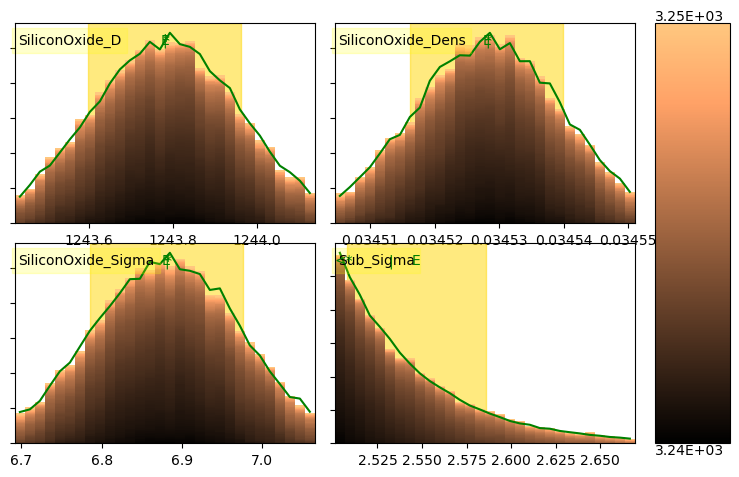

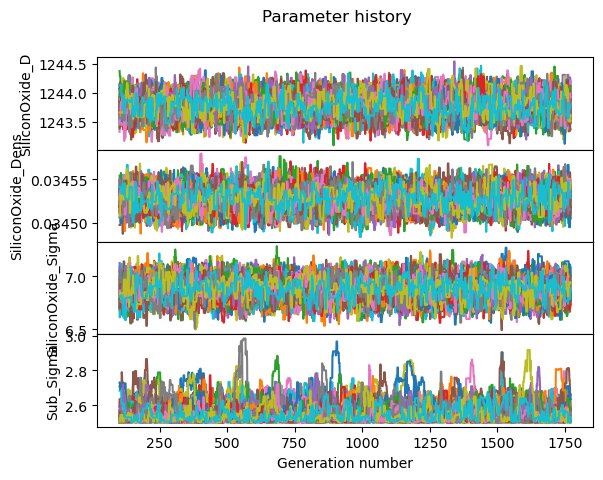

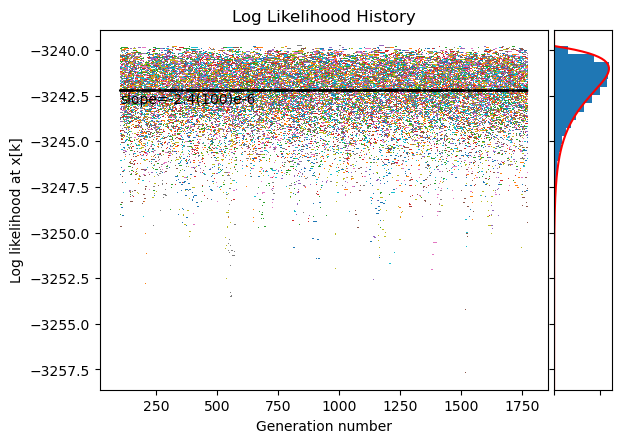

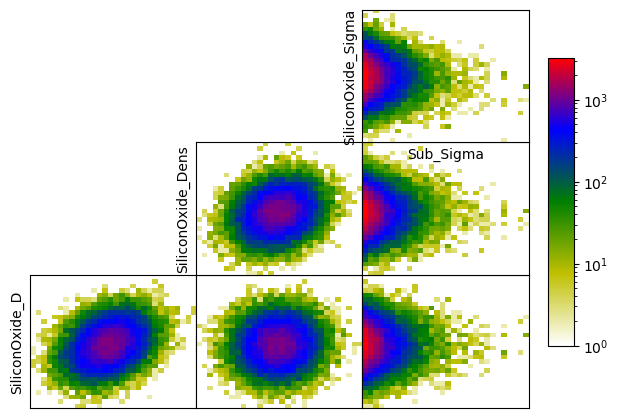

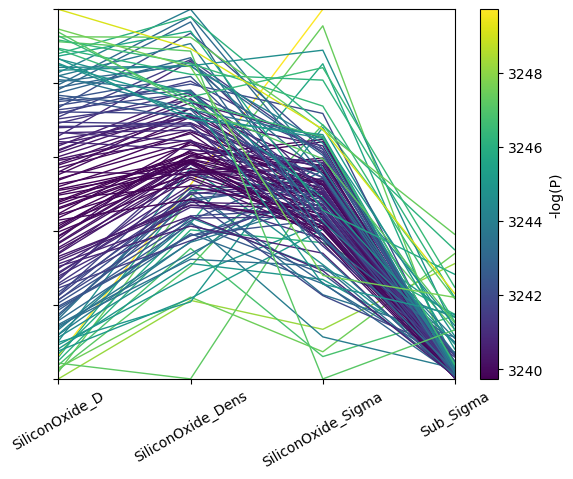

In [7]:
plot_all(res.state)

### Update the model with resulting parameters

Genx Model - compiled
File: C:\Users\glavic_a\py_projects\genx\genx\genx\examples\D17_TOF_SiO.hgx
Parameters:
           Parameter        Value            Fit              Min              Max              Error           
           SiliconOxide.setDens 0.03452829960889237 True             0.0170754        0.0683016        -               
           SiliconOxide.setD 1243.7832630844434 True             675.0            2700.0           -               
           SiliconOxide.setSigma 6.882915941268533 True             2.5              10.0             -               
           Sub.setSigma     2.5000000001499023 True             2.5              10.0             -               
DataList([
           DataSet(name=NeutronData    , show=True, use=True, error=True),
           ])
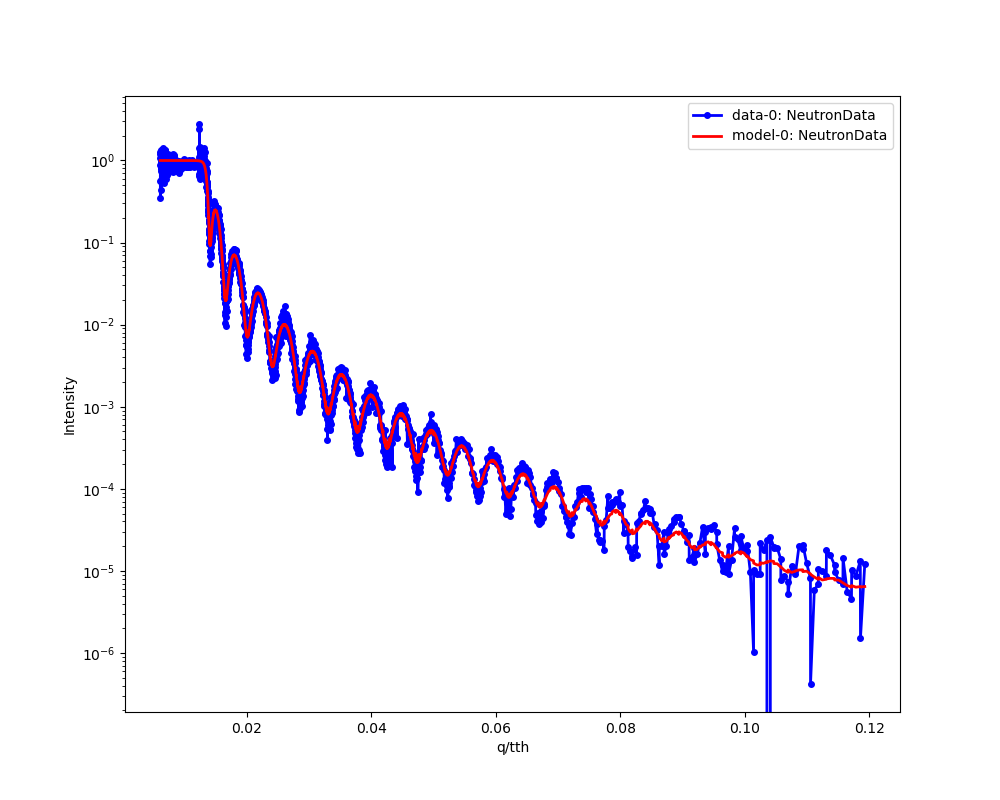

In [8]:
model.bumps_update_parameters(res)
model.simulate()
model